<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [49]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [51]:
data_train = pd.read_csv('./train.csv')

In [52]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_features = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_features = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_features + cat_features
target_col = 'Churn'

Посмотрим на пять случайных строчек в датафрейме:

In [53]:
data_train.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1522,52,66.25,3330.1,Female,0,Yes,No,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
3395,70,105.55,7195.35,Female,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),0
1744,42,80.45,3375.9,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,Yes,Yes,Yes,One year,No,Credit card (automatic),0
4773,35,83.15,2848.45,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,0
4201,32,98.85,3089.6,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,0


Определим количество NAN-ов в каждой колонке:

In [54]:
data_train.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Как видим, значений NAN в датафрейме не имеется. Однако имеются значения равные пробелу, которые не помечены как NAN, но являются пропущенными.

In [55]:
(data_train == ' ').sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Как видим, в TotalSpent 9 значений равно пробелу. Заменим их на np.nan и приведём к типу float:

In [56]:
data_train.TotalSpent = (np.where(data_train.TotalSpent == ' ', np.nan, data_train.TotalSpent)).astype(float)

Построим график распределения данного признака:

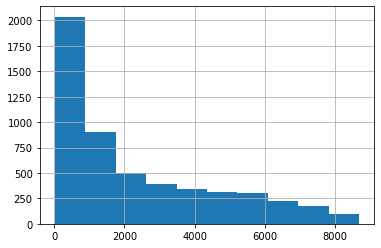

In [57]:
data_train.TotalSpent.hist()
pass

Заменим пропущенные на значения на среднее значение:

In [58]:
data_train.TotalSpent.fillna(data_train.TotalSpent.mean(), inplace=True)
data_train.TotalSpent.isna().sum()

0

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [59]:
print([a for a, b in enumerate(['one', 'sec'])])

[0, 1]


In [60]:
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

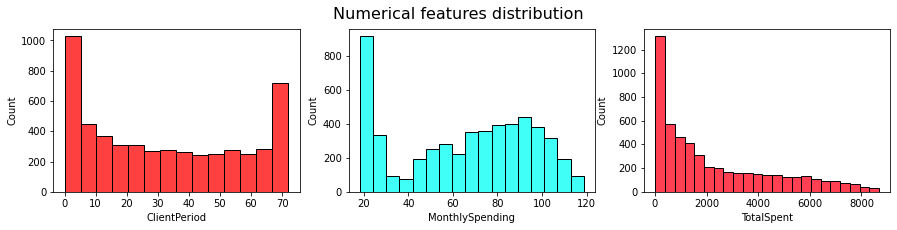

In [61]:
colors = get_cmap(3)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
fig.suptitle("Numerical features distribution", fontsize=(16))
for index, axis in enumerate(axes):
  sns.histplot(data=data_train[num_features[index]], ax=axis, color=colors(index))

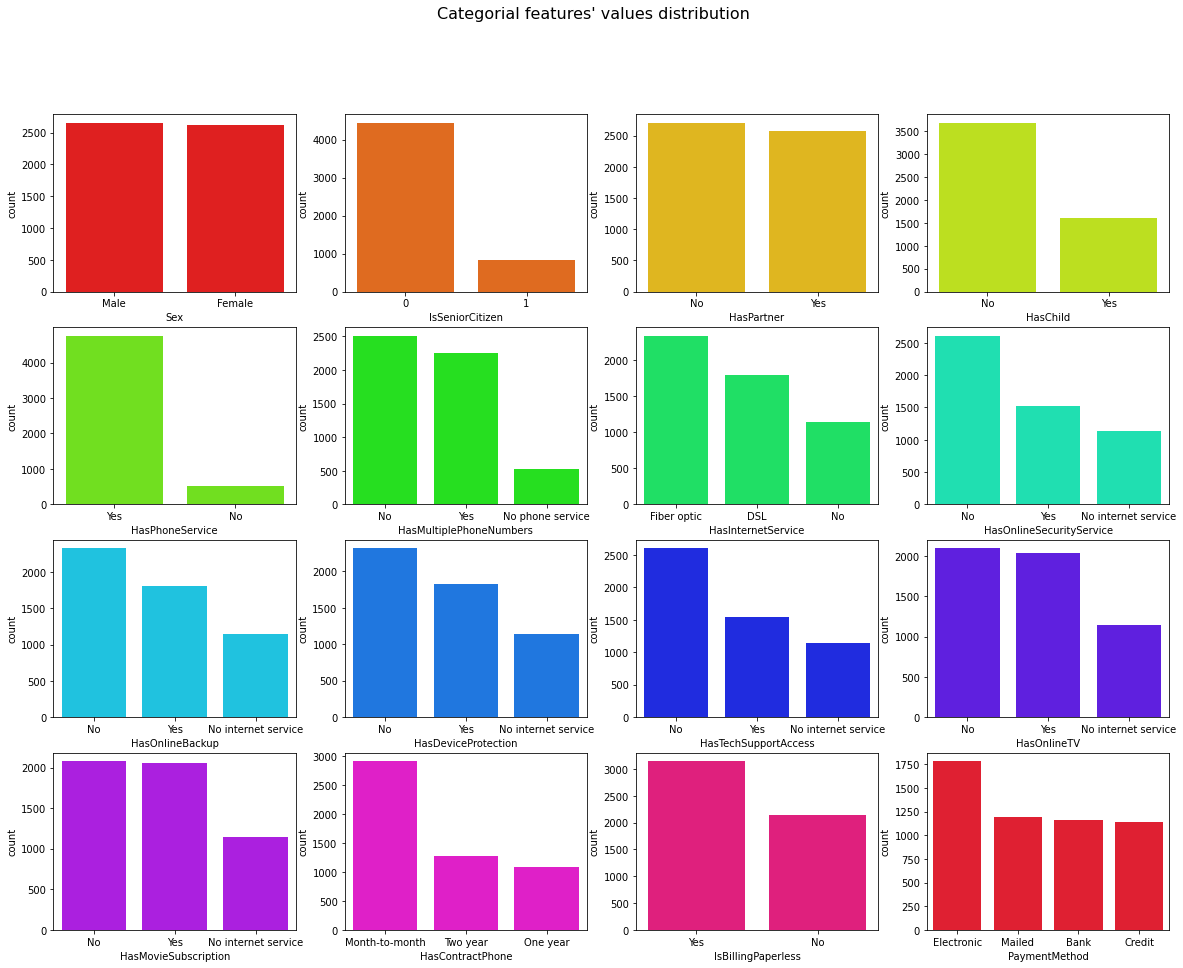

In [62]:
colors = get_cmap(16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
fig.suptitle("Categorial features' values distribution", fontsize=(16))
for row_ind, axis_row in enumerate(axes):
  for ax_ind, axis in enumerate(axis_row):
    index = ax_ind + 4 * row_ind
    counts = data_train[cat_features[index]].value_counts()
    names = [name.split()[0] if index == 15 else name for name in counts.index]
    barplot = sns.barplot(x=names, y=counts.values, ax=axis, color=colors(index))
    barplot.set_xlabel(cat_features[index])
    barplot.set_ylabel('count')

Посмотрим на распределение целевой переменной:

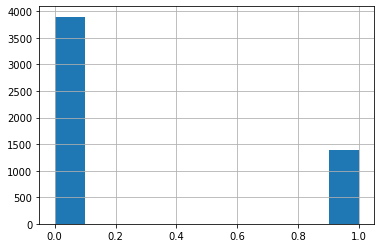

In [63]:
data_train[target_col].hist()
pass

Данные классы не являются несбалансированными, так как не удовлетворяют условию выше.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [64]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

Создаём мл пайплайн:

In [80]:
X = data_train.iloc[:, :-1]
y = data_train.iloc[:, -1]

logreg_transformer = ColumnTransformer(transformers=[
                                ('num', RobustScaler(), num_features),
                                ('cat_label', OrdinalEncoder(), cat_features),
                                ('cat_OH', OneHotEncoder(), cat_features)
])

pipeline = make_pipeline(logreg_transformer, LogisticRegression(n_jobs=-1))

params = {
    'logisticregression__max_iter' : [100, 300, 500],
    'logisticregression__C' : [100, 10, 1, 0.1, 0.01, 0.001],
    'logisticregression__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid = GridSearchCV(estimator=pipeline, param_grid=params, scoring='roc_auc', n_jobs=-1, cv=3)
grid.fit(X, y)

KeyboardInterrupt: ignored

In [66]:
print(grid.best_score_)
grid.best_params_

AttributeError: ignored

Выпишите какое лучшее качество и с какими параметрами вам удалось получить: лучшее качество - 0.843, параметры - {C - 100, max_iter = 500, solver = saga} .

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [81]:
!pip install catboost

In [82]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

In [83]:
X_train = logreg_transformer.fit_transform(X)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y, test_size=0.2)

params = {}
params['iterations'] = np.arange(18000,20001,2000)
params['learning_rate'] = np.arange(0.0005,0.00002,-0.0002)

catboost_grid = GridSearchCV(estimator=CatBoostClassifier(cat_features=cat_features), param_grid=params, scoring='roc_auc', n_jobs=-1, cv=4)
catboost_grid.fit(X, y)

KeyboardInterrupt: ignored

In [73]:
modelL.best_score

defaultdict(dict, {})

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [88]:
best_model = CatBoostClassifier(iterations=2000, learning_rate=0.00002, max_depth=13, min_data_in_leaf=3, cat_features=cat_features)
best_model.fit(X, y)
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 0.6931337	total: 42.2ms	remaining: 1m 24s
1:	learn: 0.6931183	total: 531ms	remaining: 8m 50s
2:	learn: 0.6931044	total: 607ms	remaining: 6m 44s
3:	learn: 0.6930902	total: 658ms	remaining: 5m 28s
4:	learn: 0.6930778	total: 683ms	remaining: 4m 32s
5:	learn: 0.6930658	total: 706ms	remaining: 3m 54s
6:	learn: 0.6930523	total: 763ms	remaining: 3m 37s
7:	learn: 0.6930385	total: 849ms	remaining: 3m 31s
8:	learn: 0.6930229	total: 1.32s	remaining: 4m 52s
9:	learn: 0.6930092	total: 1.39s	remaining: 4m 36s
10:	learn: 0.6929936	total: 1.59s	remaining: 4m 46s
11:	learn: 0.6929796	total: 1.66s	remaining: 4m 34s
12:	learn: 0.6929641	total: 1.86s	remaining: 4m 44s
13:	learn: 0.6929510	total: 1.91s	remaining: 4m 30s
14:	learn: 0.6929364	total: 2.11s	remaining: 4m 39s
15:	learn: 0.6929224	total: 2.14s	remaining: 4m 25s
16:	learn: 0.6929080	total: 2.27s	remaining: 4m 25s
17:	learn: 0.6928925	total: 2.8s	remaining: 5m 8s
18:	learn: 0.6928776	total: 3.13s	remaining: 5m 25s
19:	learn: 0.6928634	to

In [89]:
X_test.TotalSpent = np.where(X_test.TotalSpent == ' ', np.nan, X_test.TotalSpent).astype(float)
X_test.TotalSpent.fillna(X_test.TotalSpent.mean(), inplace=True)

In [90]:
#X_test = logreg_transformer.fit_transform(X_test)
submission['Churn'] = best_model.predict(X_test) # best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('./my_submission.csv', index=False)
submission

,Id,Churn
0,0,0
1,1,1
2,2,1
3,3,0
4,4,0
...,...,...
1756,1756,0
1757,1757,0
1758,1758,1
1759,1759,1


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.